In [1]:
# Importing libraries
import pickle
from tropical import clustering

In [2]:
# Loading dynamic signatures
with open('signatures.pickle', 'rb') as handle:
    all_signatures = pickle.load(handle)

# Obtaining signature of how the species 0 (the enzyme) is being consumend
sp0_sign_reactants = all_signatures[0]['consumption']

# Initializing clustering object
clus = clustering.ClusterSequences(sp0_sign_reactants, unique_sequences=False)
clus.diss_matrix()
clus.silhouette_score_kmeans_range(4)

,cluster_silhouette,num_clusters
0,0.976426,2
1,0.725006,3
2,0.799800,4


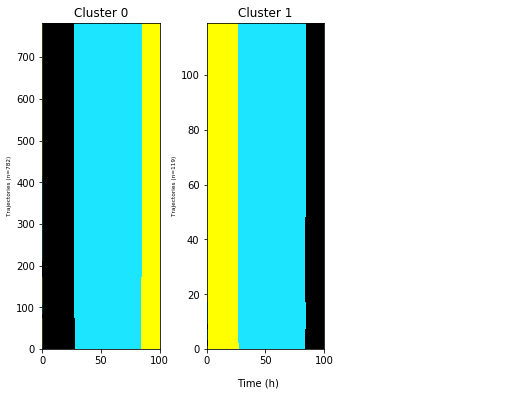

In [3]:
%matplotlib inline
# Clustering into two groups as 2 has the best Silhouette score
clus.Kmeans(2)
# Plotting clustered signatures
pl = clustering.PlotSequences(clus)
pl.all_trajectories_plot()

In [4]:
clus_info = [{0:clus.cluster_percentage_color(), 'best_silh':clus.silhouette_score()}]
clus_info

[{0: {0: (0.8679245283018868,
    '#000000',
    array([ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
            0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
            0.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,
            2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,
            2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,
            2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,
            2.,  2.,  2.,  2.,  2.,  2.,  2.,  1.,  1.,  1.,  1.,  1.,  1.,
            1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.])),
   1: (0.1320754716981132,
    '#FFFF00',
    array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
            1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
            1.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,
            2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,
            2

In [5]:
from tropical.cytoscapejs_visualization.model_visualization import ModelVisualization
from tropical.examples.double_enzymatic.mm_two_paths_model import model

viz = ModelVisualization(model)
data_viz = viz.static_view(get_passengers=True, cluster_info=clus_info)


In [6]:
from tropical.cytoscapejs_visualization.cytoscapejs import viewer as cyjs
from IPython.display import display
q=cyjs.render(data_viz)

<IPython.core.display.Javascript object>